<a href="https://colab.research.google.com/github/lromeror/DataVisualization/blob/main/Visualizaciones%20Univariables/visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [167]:
df=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/Visualizaciones%20Univariables/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
cantPasajero=df.groupby('Sex').agg({'PassengerId':'count'})
cantPasajero

,PassengerId
Sex,
female,314
male,577


##Graficos de Barra

<Axes: title={'center': 'Cantidad de Genero'}, xlabel='Sex'>

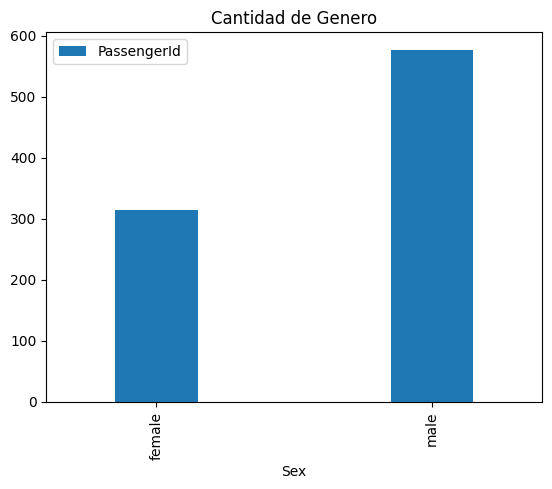

In [169]:
cantPasajero.plot.bar(y="PassengerId",width=0.3,title="Cantidad de Genero")

<Axes: xlabel='Sex', ylabel='PassengerId'>

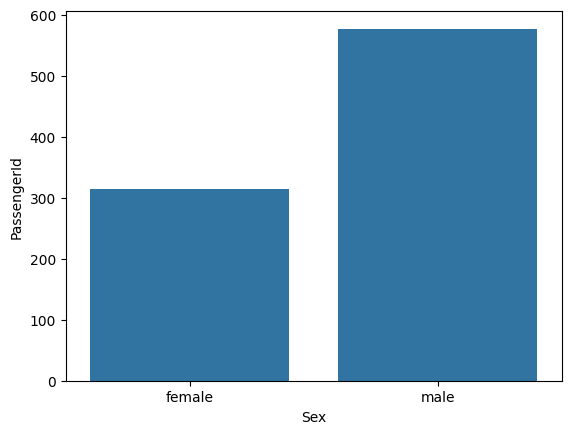

In [170]:
sns.barplot(x='Sex',y='PassengerId',data=cantPasajero)

## Grafico Pie

- Partes porcentuales de un todo
- No poner demasiadas categorias
- Mejor de Proporcion con el de magnitud
- No comparar con otr pieChar

In [171]:
cantPasajero

,PassengerId
Sex,
female,314
male,577


<Axes: title={'center': 'Cantidad de Genero'}, ylabel='PassengerId'>

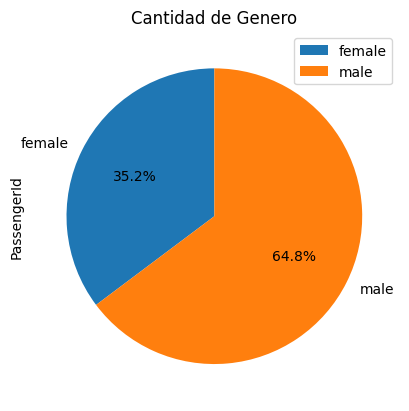

In [172]:
cantPasajero.plot.pie(y="PassengerId",autopct='%1.1f%%',title="Cantidad de Genero",startangle=90)


In [173]:
cantPasajero=cantPasajero.reset_index()

In [174]:
fig=px.pie(cantPasajero,values='PassengerId',names="Sex",title="Cantidad de Genero")
fig.show()

In [175]:
fig=px.pie(cantPasajero,values='PassengerId',names="Sex",title="Cantidad de Genero",hole=0.5)
fig.show()

##Diagrama de cajas

In [176]:
df=df.dropna(subset=['Age'],axis='index')

<Axes: title={'center': 'Age'}, xlabel='Sex'>

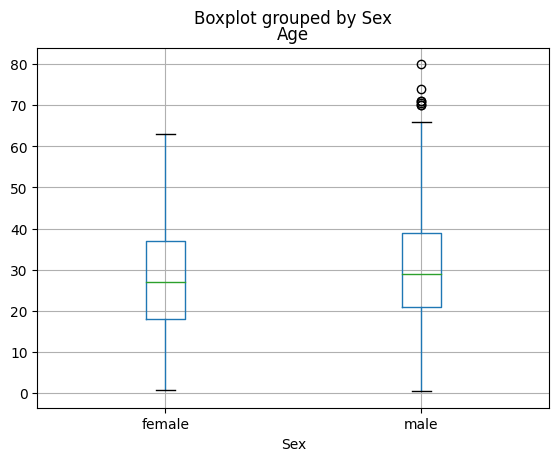

In [177]:
df.boxplot(column='Age',by='Sex')

<Axes: xlabel='Sex', ylabel='Age'>

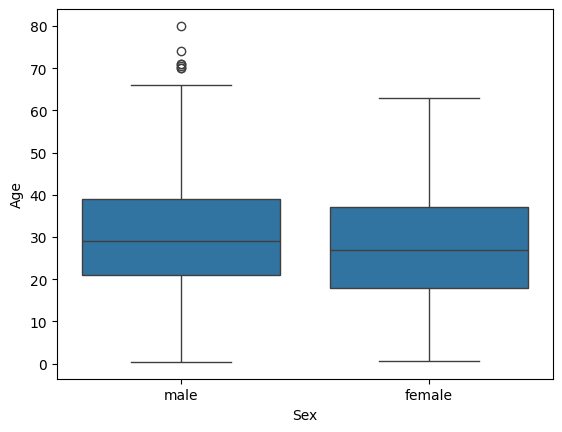

In [178]:
sns.boxplot(x='Sex',y='Age',data=df)

##Grafico de Violines

<Axes: xlabel='Sex', ylabel='Age'>

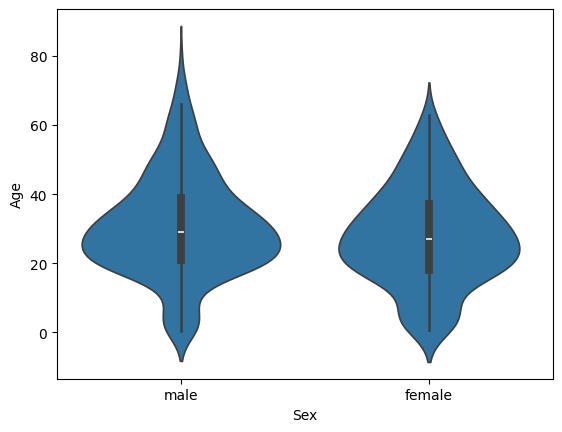

In [179]:
sns.violinplot(x='Sex',y='Age',data=df)

<Axes: xlabel='Sex', ylabel='Age'>

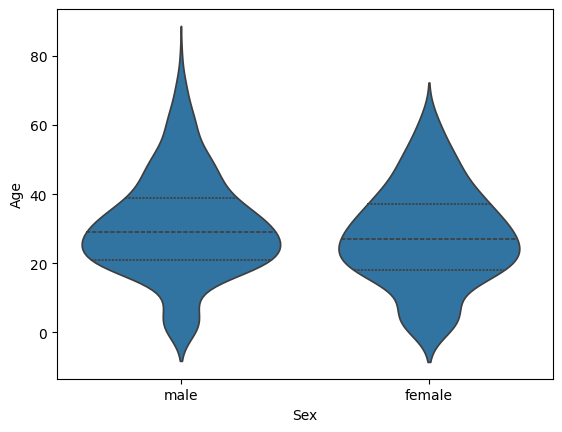

In [180]:
sns.violinplot(x='Sex',y='Age',data=df,inner='quartile')

##Histograma

- Forma de distribucion

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

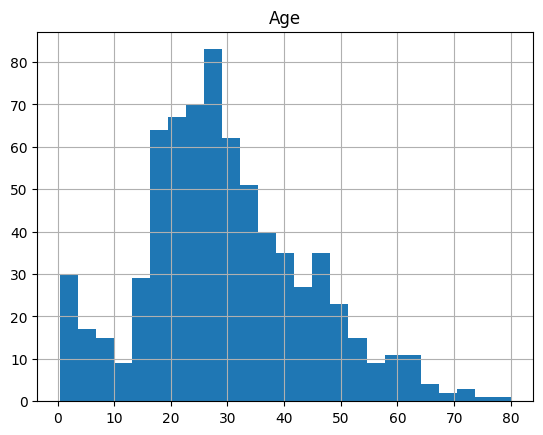

In [181]:
df.hist(column='Age',bins=25)

array([<Axes: title={'center': 'female'}>,
       <Axes: title={'center': 'male'}>], dtype=object)

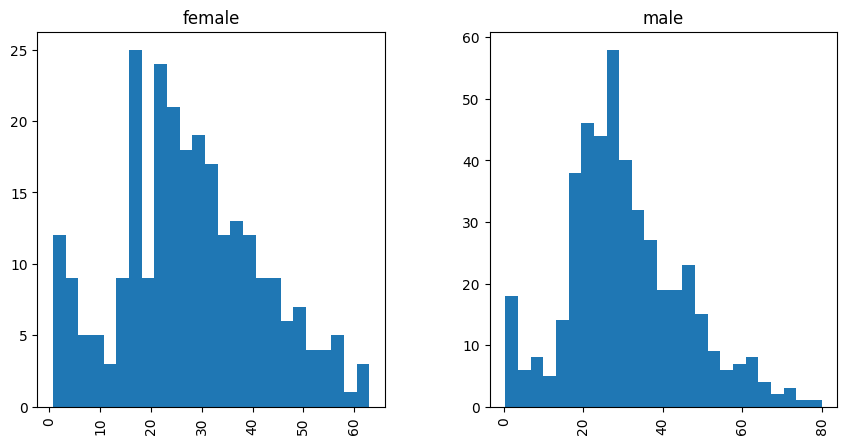

In [182]:
df.hist(column='Age',by='Sex',bins=25,figsize=(10,5))

Histograma con KDE

<Axes: xlabel='Age', ylabel='Probability'>

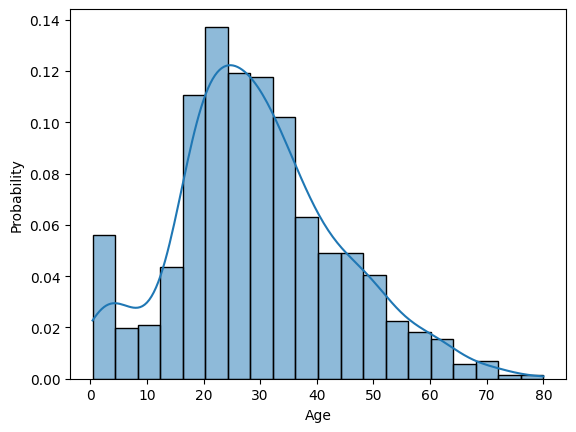

In [183]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',bins=20)

<Axes: xlabel='Age', ylabel='Probability'>

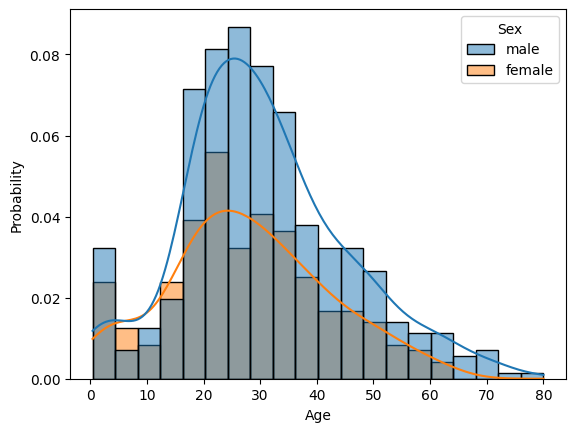

In [184]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',hue='Sex')

##Ojiva

<Axes: xlabel='Age', ylabel='Probability'>

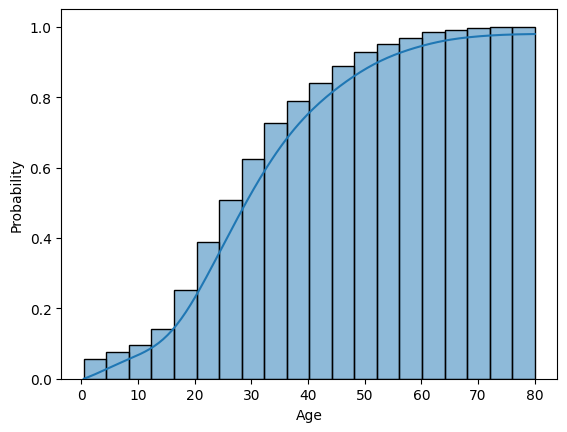

In [185]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',cumulative=True)

<Axes: xlabel='Age', ylabel='Probability'>

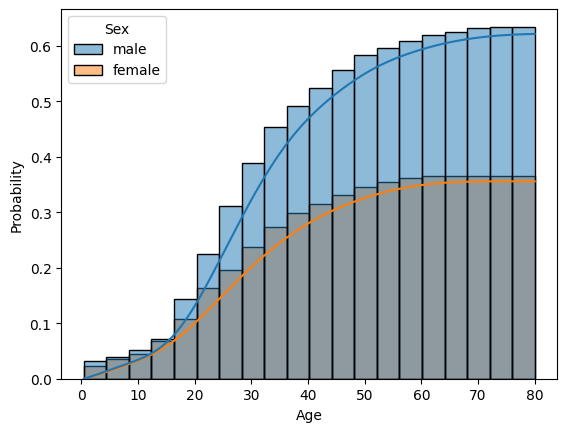

In [186]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',hue='Sex',cumulative=True)

<Axes: xlabel='Age', ylabel='Probability'>

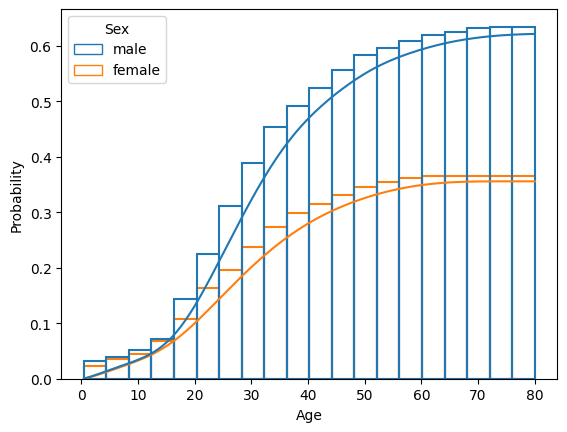

In [187]:
sns.histplot(x='Age',data=df,kde=True,stat='probability',hue='Sex',cumulative=True,fill=False)

##Grafico de Lineas

In [188]:
df2=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/Visualizaciones%20Univariables/tienda_ventas.csv',index_col='id')
df2.head(10)

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0
5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,2013-01-01,1,CELEBRATION,0.0,0
7,2013-01-01,1,CLEANING,0.0,0
8,2013-01-01,1,DAIRY,0.0,0


In [189]:
df2['mes']=df2['date'].apply(lambda x: x[:7])
df2.head()

,date,store_nbr,family,sales,onpromotion,mes
id,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01
1,2013-01-01,1,BABY CARE,0.0,0,2013-01
2,2013-01-01,1,BEAUTY,0.0,0,2013-01
3,2013-01-01,1,BEVERAGES,0.0,0,2013-01
4,2013-01-01,1,BOOKS,0.0,0,2013-01


In [190]:
bymes=df2.groupby('mes').agg({'sales':'sum'})
bymes

,sales
mes,
2013-01,1.032762e+07
2013-02,9.658960e+06
2013-03,1.142850e+07
2013-04,1.099346e+07
2013-05,1.159770e+07
2013-06,1.168934e+07
2013-07,1.125740e+07
2013-08,1.173779e+07
2013-09,1.179293e+07


<Axes: title={'center': 'Ventas por Mes'}, xlabel='mes'>

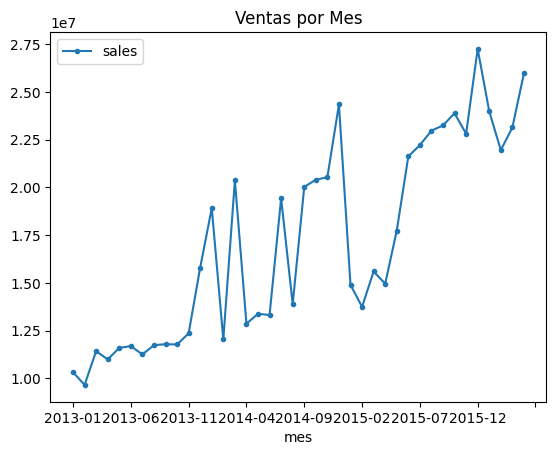

In [191]:
bymes.plot.line(title='Ventas por Mes',y='sales',style='.-')

In [192]:
px.line(bymes,y='sales',title='Ventas por Mes')

## Grafico Multilineas

In [193]:
df2['anio']=df2['date'].apply(lambda x: x[:4])
df2.head()

,date,store_nbr,family,sales,onpromotion,mes,anio
id,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01,2013
1,2013-01-01,1,BABY CARE,0.0,0,2013-01,2013
2,2013-01-01,1,BEAUTY,0.0,0,2013-01,2013
3,2013-01-01,1,BEVERAGES,0.0,0,2013-01,2013
4,2013-01-01,1,BOOKS,0.0,0,2013-01,2013


In [194]:
df2_2015=df2[(df2['anio']=='2015')&(df2['family'].isin(['SEAFOOD','MEATS','DAIRY']))]
df2_2015

,date,store_nbr,family,sales,onpromotion,mes,anio
id,,,,,,,
1297304,2015-01-01,1,DAIRY,0.000,0,2015-01,2015
1297320,2015-01-01,1,MEATS,0.000,0,2015-01,2015
1297328,2015-01-01,1,SEAFOOD,0.000,0,2015-01,2015
1297337,2015-01-01,10,DAIRY,0.000,0,2015-01,2015
1297353,2015-01-01,10,MEATS,0.000,0,2015-01,2015
...,...,...,...,...,...,...,...
1945902,2015-12-31,8,MEATS,382.466,0,2015-12,2015
1945910,2015-12-31,8,SEAFOOD,21.428,0,2015-12,2015
1945919,2015-12-31,9,DAIRY,878.000,1,2015-12,2015


In [195]:
agrupacion=df2_2015.groupby(['mes','family']).agg({'sales':'sum'})
agrupacion

sales
mes     family               
2015-01 DAIRY    1.134521e+06
        MEATS    5.431177e+05
        SEAFOOD  4.046584e+04
2015-02 DAIRY    1.020747e+06
        MEATS    4.987351e+05
        SEAFOOD  3.606656e+04
2015-03 DAIRY    1.234851e+06
        MEATS    5.465172e+05
        SEAFOOD  4.380847e+04
2015-04 DAIRY    1.181180e+06
        MEATS    5.223043e+05
        SEAFOOD  3.998347e+04
2015-05 DAIRY    1.293308e+06
        MEATS    5.916919e+05
        SEAFOOD  4.250683e+04
2015-06 DAIRY    1.243588e+06
        MEATS    5.650141e+05
        SEAFOOD  3.878055e+04
2015-07 DAIRY    1.244815e+06
        MEATS    5.949037e+05
        SEAFOOD  3.853559e+04
2015-08 DAIRY    1.263428e+06
        MEATS    5.812141e+05
        SEAFOOD  3.776758e+04
2015-09 DAIRY    1.224619e+06
        MEATS    5.627116e+05
        SEAFOOD  4.190637e+04
2015-10 DAIRY    1.314827e+06
        MEATS    5.807884e+05
        SEAFOOD  4.142396e+04
2015-11 DAIRY    1.283672e+06
        MEATS    5.359089e+05
        SEAFOOD  3.882376e+04
2015-12 DAIRY    1.394582e+06
        MEATS    5.673814e+05
        SEAFOOD  3.372828e+04

In [196]:
agrupacion=agrupacion.reset_index(1)
agrupacion

,family,sales
mes,,
2015-01,DAIRY,1.134521e+06
2015-01,MEATS,5.431177e+05
2015-01,SEAFOOD,4.046584e+04
2015-02,DAIRY,1.020747e+06
2015-02,MEATS,4.987351e+05
2015-02,SEAFOOD,3.606656e+04
2015-03,DAIRY,1.234851e+06
2015-03,MEATS,5.465172e+05
2015-03,SEAFOOD,4.380847e+04


In [197]:
agruPivot=agrupacion.pivot(columns='family').droplevel(0,axis='columns')
agruPivot

family,DAIRY,MEATS,SEAFOOD
mes,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


<Axes: title={'center': 'Ventas por Mes'}, xlabel='mes'>

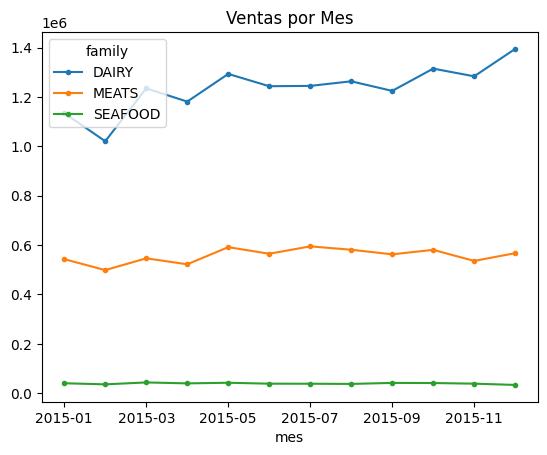

In [198]:
agruPivot.plot.line(title='Ventas por Mes',style='.-')

array([<Axes: xlabel='mes'>, <Axes: xlabel='mes'>, <Axes: xlabel='mes'>],
      dtype=object)

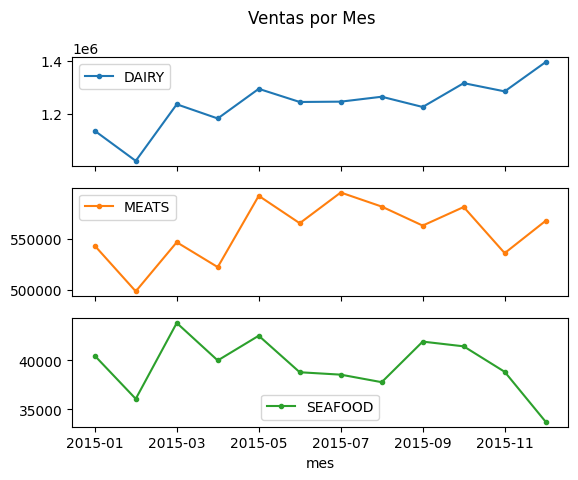

In [199]:
agruPivot.plot.line(title='Ventas por Mes',style='.-',subplots=True)

##Area Chart

- Grafico empieza desde cero a diferencia de la grafica de linea

<Axes: title={'center': 'Ventas por Mes'}, xlabel='mes'>

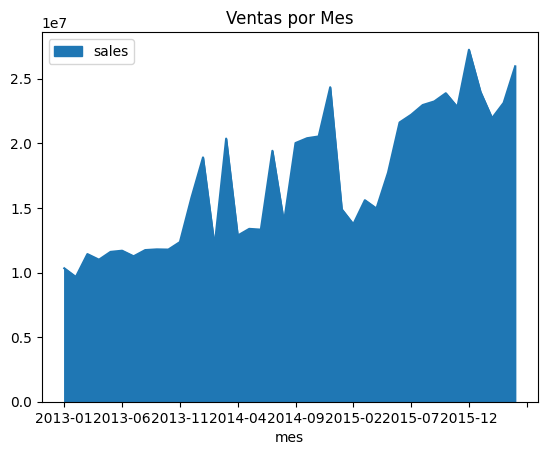

In [200]:
bymes.plot.area(title='Ventas por Mes',y='sales')

##Areas apiladas

- Las areas se van apilando una encima de otra osea que se van sumando
- Magnifico para comparar porporciones entre grupo mas no magnitudes

<Axes: title={'center': 'Ventas por Mes'}, xlabel='mes'>

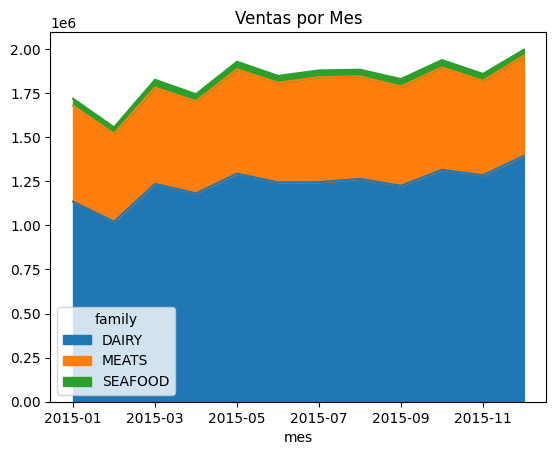

In [201]:
agruPivot.plot.area(title='Ventas por Mes',stacked=True)

## Areas Agrupadas

- Grafica no recomendada

<Axes: title={'center': 'Ventas por Mes'}, xlabel='mes'>

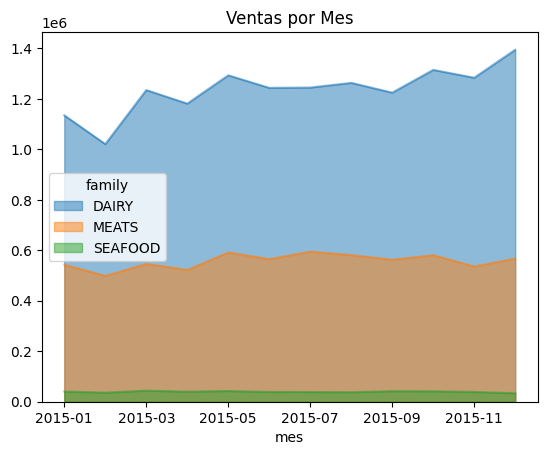

In [202]:
agruPivot.plot.area(title='Ventas por Mes',stacked=False)

In [203]:
agruPivot.to_csv('agruPivot.csv',index=False)